In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot
from datetime import datetime

In [11]:
df = pd.read_csv("datasets/energy_dataset.csv",
                sep = ',')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
time                                           35064 non-null object
generation biomass                             35045 non-null float64
generation fossil brown coal/lignite           35046 non-null float64
generation fossil coal-derived gas             35046 non-null float64
generation fossil gas                          35046 non-null float64
generation fossil hard coal                    35046 non-null float64
generation fossil oil                          35045 non-null float64
generation fossil oil shale                    35046 non-null float64
generation fossil peat                         35046 non-null float64
generation geothermal                          35046 non-null float64
generation hydro pumped storage aggregated     0 non-null float64
generation hydro pumped storage consumption    35045 non-null float64
generation hydro run-of-river and poundage     35045 non

In [13]:
df.drop(columns=['generation hydro pumped storage aggregated','forecast wind offshore eday ahead'], inplace=True)

In [14]:
df.head(3)

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,49.0,196.0,0.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,50.0,195.0,0.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,50.0,196.0,0.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48


In [15]:
#The focus in first place is going to be forecasting the whole month of september 2018.
#For this purpose, let's simplify the dataset

In [25]:
#let's simplify for now, considering only solar energy 
df_solar = df[['time','generation solar']]
# first we have to correct the timestamps based on the timezone part given, as it is given in UTC:
df_solar['time'] = pd.to_datetime(df_solar['time'], utc= True) 
df_solar['time'] = df_solar['time'].dt.tz_localize(None)
df_solar = df_solar[df_solar['time']<'2018-10-01']

C:\Users\jrodriguezca\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\jrodriguezca\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [26]:
# to cross check that the values have been correctly filtered

df_solar.sort_values(by=['time'], ascending = False).head(3)

,time,generation solar
32856,2018-09-30 23:00:00,17.0
32855,2018-09-30 22:00:00,16.0
32854,2018-09-30 21:00:00,146.0


In [27]:
df_solar.set_index('time', drop=True, inplace=True)

In [28]:
df_solar.head()

,generation solar
time,
2014-12-31 23:00:00,49.0
2015-01-01 00:00:00,50.0
2015-01-01 01:00:00,50.0
2015-01-01 02:00:00,50.0
2015-01-01 03:00:00,42.0


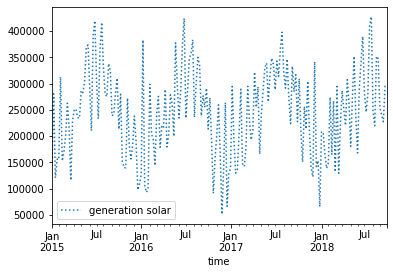

In [30]:
week_sample = df_solar.resample('W').sum()
week_sample.plot(style=[':','--','-'])

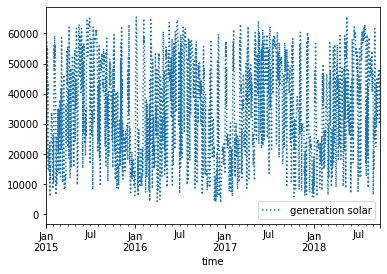

In [31]:
day_sample = df_solar.resample('D').sum()
day_sample.plot(style=[':','--','-'])

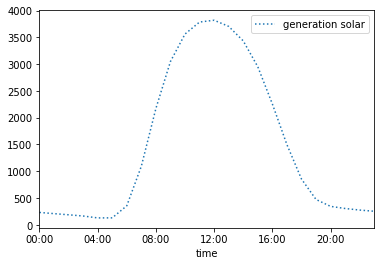

In [39]:
hour_sample = df_solar.groupby(df_solar.index.time).mean()
hourly_ticks = 4*60*60* np.arange(6)
hour_sample.plot(xticks = hourly_ticks, style=[':','--','-'])

array([    0, 14400, 28800, 43200, 57600, 72000])